## Unveiling Bias in COMPAS Dataset: A Study on Racial Disparities in Correctional Offender Profiling

![picture](https://assets-global.website-files.com/63b7152f92a121295976e6ed/63c5783fb97e3d2a38fec311_61041960f3ea4cb84232cdc8_WomenBehindBars.png)

**<font size=4>Context:</font>**

**<font size=2>COMPAS (Correctional Offender Management Profiling for Alternative Sanctions) is a popular commercial algorithm used by judges and parole officers for scoring criminal defendant’s likelihood of reoffending (recidivism). It has been shown that the algorithm is biased in favor of one race defendants, and against another race inmates, based on a 2 year follow up study (i.e who actually committed crimes or violent crimes after 2 years). The pattern of mistakes, as measured by precision/sensitivity is notable.</font>**

**<font size=4>Content:</font>**

**<font size=2>Data contains variables used by the COMPAS algorithm in scoring defendants, along with their outcomes within 2 years of the decision, for over 10,000 criminal defendants in Broward County, Florida.
3 subsets of the data are provided, including a subset of only violent recividism (as opposed to, e.g. being reincarcerated for non violent offenses such as vagrancy or Marijuana).</font>**

**Dataset source link**: https://www.kaggle.com/datasets/danofer/compass/data

## Table of Contents
* [1.Import_Python_Libraries](#1.Import_Python_Libraries)
* [2.Reading_and_Understanding_the_Dataset](#2.Reading_and_Understanding_the_Dataset)
* [3.Data_Visualisation](#3.Data_Visualisation)
* [4.Training_the_Dataset_and_Modelling](#4.Training_the_Dataset_and_Modelling)
    * [4.1.Racial_Group_Modelling](#4.1.Racial_Group_Modelling)
        * [4.1.1.Model_Interpretation](#4.1.1.Model_Interpretation)
        * [4.1.2.Identifing_Bias_in_the_Model's_Predicted](#4.1.2.Identifing_Bias_in_the_Model's_Predicted)
        * [4.1.3.Racial_Group_Modelling_Visualisation](#4.1.3.Racial_Group_Modelling_Visualisation)
    * [4.2.Hyperparameter_Tuning_Racial_Group_Modelling](#4.2.Hyperparameter_Tuning_Racial_Group_Modelling)
        * [4.2.1.Hyperparameter_Tuning_Racial_Group_Modelling_Vis](#4.2.1.Hyperparameter_Tuning_Racial_Group_Modelling_Vis)

### 1.Import_Python_Libraries

In [1]:
#This is to import the library needed while some will be needed in the project.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
label_encoder = LabelEncoder()
scaler = StandardScaler()
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# This line of code imports the data and converts it into a pandas dataframe

compas = pd.read_csv("/kaggle/input/compass/cox-violent-parsed.csv")

In [3]:
#This line of code will display the number of observations(rows) and features(columns) in the dataset
row,column=compas.shape
print(f"The compas dataset contain {row} rows and {column} columns")

The compas dataset contain 18316 rows and 52 columns


In [4]:
#This will show the first five rows about the dataset

compas.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event
0,1.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,0,1,0,0,0,-1.0,13/08/2013 6:03,14/08/2013 5:41,13011352CF10A,13/08/2013,NaN,1.0,(F3),Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,0,327,0
1,2.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,0,1,0,0,0,-1.0,13/08/2013 6:03,14/08/2013 5:41,13011352CF10A,13/08/2013,NaN,1.0,(F3),Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,334,961,0
2,3.0,michael ryan,michael,ryan,31/12/2014,Male,06/02/1985,31,25 - 45,Caucasian,0,5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,5,Medium,31/12/2014,Risk of Violence,2,Low,31/12/2014,30/12/2014,03/01/2015,0,3,457,0
3,4.0,kevon dixon,kevon,dixon,27/01/2013,Male,22/01/1982,34,25 - 45,African-American,0,3,0,0,0,-1.0,26/01/2013 3:45,05/02/2013 5:36,13001275CF10A,26/01/2013,NaN,1.0,(F3),Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,05/07/2013,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),05/07/2013,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,27/01/2013,Risk of Violence,1,Low,27/01/2013,26/01/2013,05/02/2013,0,9,159,1
4,5.0,ed philo,ed,philo,14/04/2013,Male,14/05/1991,24,Less than 25,African-American,0,4,0,1,4,-1.0,13/04/2013 4:58,14/04/2013 7:02,13005330CF10A,13/04/2013,NaN,1.0,(F3),Possession of Cocaine,1,13011511MM10A,(M1),0.0,16/06/2013,Driving Under The Influence,16/06/2013,16/06/2013,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,14/04/2013,Risk of Violence,3,Low,14/04/2013,16/06/2013,16/06/2013,4,0,63,0


In [5]:
#This info() will show the information about the sets incuding column name, count and data type

compas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18316 entries, 0 to 18315
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       11001 non-null  float64
 1   name                     18316 non-null  object 
 2   first                    18316 non-null  object 
 3   last                     18316 non-null  object 
 4   compas_screening_date    18316 non-null  object 
 5   sex                      18316 non-null  object 
 6   dob                      18316 non-null  object 
 7   age                      18316 non-null  int64  
 8   age_cat                  18316 non-null  object 
 9   race                     18316 non-null  object 
 10  juv_fel_count            18316 non-null  int64  
 11  decile_score             18316 non-null  int64  
 12  juv_misd_count           18316 non-null  int64  
 13  juv_other_count          18316 non-null  int64  
 14  priors_count          

In [6]:
#This drop({[]}) will remove all the column listed that are not needed for the analysis

compas = compas.drop(['last','first','out_custody','in_custody','c_offense_date','decile_score.1','priors_count.1','c_case_number','days_b_screening_arrest','start','end','event','screening_date','c_case_number','juv_other_count','juv_misd_count','juv_fel_count','r_days_from_arrest','id','r_charge_degree','r_offense_date', 'vr_case_number','r_case_number','r_jail_out','c_arrest_date','r_charge_desc','r_jail_in', 'violent_recid','vr_charge_degree','vr_offense_date','vr_charge_desc'], axis=1)

In [7]:
#This is to change the data type from object to date

compas['c_jail_in'] = pd.to_datetime(compas['c_jail_in'])
compas['c_jail_out'] = pd.to_datetime(compas['c_jail_out'])
compas['days_in_jail'] = abs((compas['c_jail_out'] - compas['c_jail_in']).dt.days)
compas['compas_screening_date'] = pd.to_datetime(compas['compas_screening_date'])
compas['v_screening_date'] = pd.to_datetime(compas['v_screening_date'])

In [8]:
#This info() will show the information about the sets incuding column name, count and data type

compas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18316 entries, 0 to 18315
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   18316 non-null  object        
 1   compas_screening_date  18316 non-null  datetime64[ns]
 2   sex                    18316 non-null  object        
 3   dob                    18316 non-null  object        
 4   age                    18316 non-null  int64         
 5   age_cat                18316 non-null  object        
 6   race                   18316 non-null  object        
 7   decile_score           18316 non-null  int64         
 8   priors_count           18316 non-null  int64         
 9   c_jail_in              17019 non-null  datetime64[ns]
 10  c_jail_out             17019 non-null  datetime64[ns]
 11  c_days_from_compas     17449 non-null  float64       
 12  c_charge_degree        17449 non-null  object        
 13  c

**SN------Variables------Details**

1	**name;**	The name of the defendant or individual.

2	**sex;**	Gender or sex of the defendant (e.g., Male, Female).

3	**dob;**	Date of birth of the defendant.

4	**age;**	Age of the defendant at the time of assessment.

5	**age_cat;**	Categorized age group of the defendant (e.g., "Less than 25", "25-45", "Greater than 45").

6	**race;**	Race or ethnicity of the defendant (e.g., Caucasian, African-American, Hispanic, etc.).

7	**decile_score;**	Risk score assigned by the COMPAS algorithm, indicating the defendant's perceived risk of recidivism    (ranges typically from 1 to 10, with 10 being the highest risk).

8	**priors_count;**	Number of prior criminal offenses or counts.

9	**c_jail_in;**	Date and time when the defendant was admitted to jail.

10	**c_jail_out;**	Date and time when the defendant was released from jail.

11	**c_days_from_compas;**	Number of days between the COMPAS assessment and the defendant's jail admission.

12	**c_charge_degree;**	Degree of criminal charge (e.g., Felony, Misdemeanor).

13	**c_charge_desc;**	Description of the criminal charge.

14	**is_recid;**	Binary indicator (0 or 1) whether the defendant was recidivated within a specific time frame.

15	**is_violent_recid;**	Binary indicator (0 or 1) whether the defendant's recidivism was violent in nature.

16	**type_of_assessment;**	Type of assessment conducted (e.g., Pretrial, Risk of Violence).

17	**score_text**	Textual representation of the risk score (e.g., "Low", "Medium", "High").

18	**screening_date;**	Date of the assessment screening.

19	**v_type_of_assessment;**	Type of violent risk assessment conducted.

20	**v_decile_score;**	Risk score assigned by the violent risk assessment.

21	**v_score_text;**	extual representation of the violent risk score.

22	**v_screening_date;**	Date of the violent risk assessment screening.

23	**days_in_jail;**	Days spent in jail.


In [9]:
#data.isnull().sum() is used to get the number of missing records in each column

print("The sum of Null values in each columns ")

compas.isnull().sum()

The sum of Null values in each columns 


name                        0
compas_screening_date       0
sex                         0
dob                         0
age                         0
age_cat                     0
race                        0
decile_score                0
priors_count                0
c_jail_in                1297
c_jail_out               1297
c_days_from_compas        867
c_charge_degree           867
c_charge_desc             881
is_recid                    0
is_violent_recid            0
type_of_assessment          0
score_text                 23
v_type_of_assessment        0
v_decile_score              0
v_score_text                6
v_screening_date            0
days_in_jail             1297
dtype: int64

In [10]:
# Impute missing values for numerical variables
numeric_cols = ['c_days_from_compas', 'v_decile_score']
for col in numeric_cols:
    compas[col].fillna(compas[col].median(), inplace=True)

# Impute missing values for categorical variables
categorical_cols = ['c_charge_degree', 'score_text', 'v_score_text', 'c_jail_in', 'c_jail_out', 'c_charge_desc', 'days_in_jail']
for col in categorical_cols:
    compas[col].fillna(compas[col].mode()[0], inplace=True)

# Check if there are any missing values remaining
print(compas.isnull().sum())

name                     0
compas_screening_date    0
sex                      0
dob                      0
age                      0
age_cat                  0
race                     0
decile_score             0
priors_count             0
c_jail_in                0
c_jail_out               0
c_days_from_compas       0
c_charge_degree          0
c_charge_desc            0
is_recid                 0
is_violent_recid         0
type_of_assessment       0
score_text               0
v_type_of_assessment     0
v_decile_score           0
v_score_text             0
v_screening_date         0
days_in_jail             0
dtype: int64


**The code above replace the missing value in numerical column with the column's median while it does the same in categorical column using the column's mode**

In [11]:
#This provides a statistics summary of all data, excluding object, category etc

compas.describe()

,compas_screening_date,age,decile_score,priors_count,c_jail_in,c_jail_out,c_days_from_compas,is_recid,is_violent_recid,v_decile_score,v_screening_date,days_in_jail
count,18316,18316.000000,18316.000000,18316.000000,18316,18316,18316.000000,18316.000000,18316.000000,18316.000000,18316,18316.000000
mean,2013-11-22 23:28:18.973574912,34.019273,4.997052,3.913191,2013-11-06 20:46:19.209434624,2013-12-06 14:03:25.459707392,55.010919,0.414774,0.073105,4.022822,2013-11-22 23:28:18.973574912,23.293514
min,2013-01-01 00:00:00,18.000000,-1.000000,0.000000,2013-01-01 01:31:00,2013-01-02 01:12:00,0.000000,-1.000000,0.000000,-1.000000,2013-01-01 00:00:00,0.000000
25%,2013-04-22 00:00:00,25.000000,2.000000,0.000000,2013-03-30 01:04:00,2013-04-30 07:29:00,1.000000,0.000000,0.000000,2.000000,2013-04-22 00:00:00,0.000000
50%,2013-11-08 00:00:00,31.000000,5.000000,2.000000,2013-10-18 01:38:00,2013-11-13 01:00:00,1.000000,0.000000,0.000000,4.000000,2013-11-08 00:00:00,1.000000
75%,2014-05-29 00:00:00,41.000000,8.000000,5.000000,2014-05-15 10:48:00,2014-06-10 07:35:00,2.000000,1.000000,0.000000,6.000000,2014-05-29 00:00:00,14.000000
max,2014-12-31 00:00:00,96.000000,10.000000,43.000000,2016-03-11 10:26:00,2020-01-01 00:00:00,9485.000000,1.000000,1.000000,10.000000,2014-12-31 00:00:00,2152.000000
std,NaN,11.667811,2.937569,5.299864,NaN,NaN,310.610219,0.576449,0.260317,2.614189,NaN,64.917074


**This shows the summary statistics of the numerical variable, i.e the mean, standard deviation, minimum, lower quartile, interquartile, upper quartile and maxinmum vaues of each variables**

### 3.Data_Visualisation

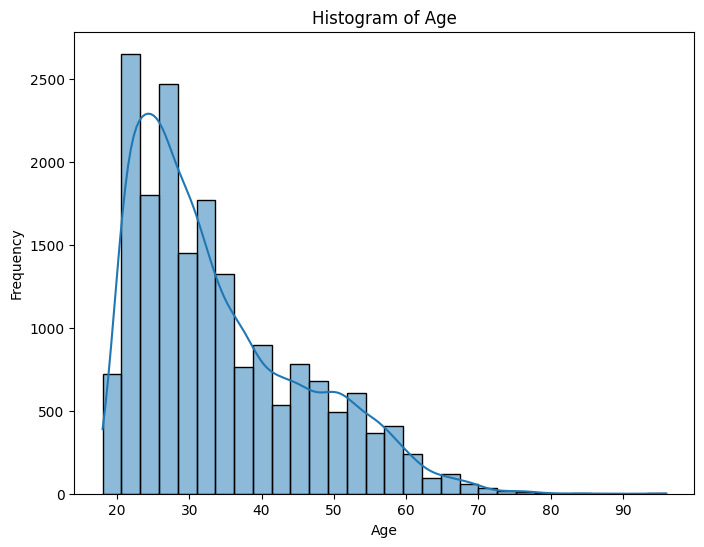

In [12]:
# Plot histogram of age
plt.figure(figsize=(8, 6))
sns.histplot(data=compas, x='age', bins=30, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**This positive skew histogram plot shows that the crime rate commenced at age 20 and the higher the age the lesser the crime commited**

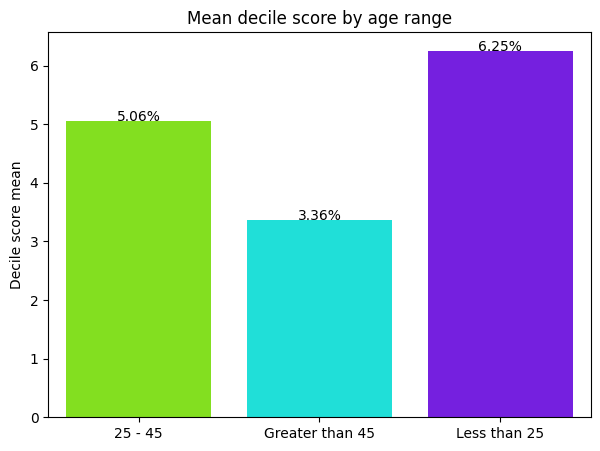

In [13]:
# Plot bar mean decile score of age range

decile_mean_age = compas.groupby("age_cat")["decile_score"].mean().reset_index()

plt.figure(figsize=(7, 5))
sns.barplot(data=decile_mean_age, x="age_cat", y="decile_score", 
            palette=sns.color_palette("hsv", len(decile_mean_age)))

plt.ylabel("Decile score mean")
plt.xlabel("")
plt.title("Mean decile score by age range")

# Add percentage labels to each bar
for index, row in decile_mean_age.iterrows():
    plt.text(index, row['decile_score'], f"{row['decile_score']:.2f}%", 
             color='black', ha="center")

plt.show(block=False)

**The Mean decile score by age range indicate that less than 25 had highest decile mean score follow by 25 - 45 while 45 and above had lowest.**

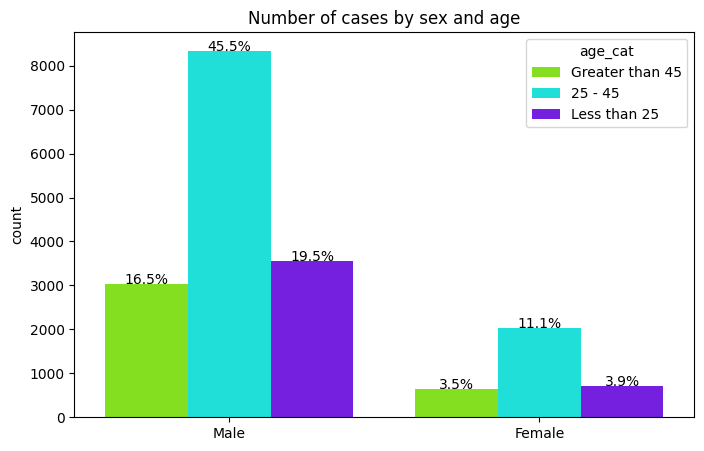

In [14]:
# Plot Count number of cases by sex and age

plt.figure(figsize=(8, 5)) 
ax = sns.countplot(data=compas, x="sex", hue="age_cat", palette=sns.color_palette("hsv", 3)) 
plt.title("Number of cases by sex and age") 
plt.xlabel("") 

# Calculate total count for each category
total_counts = compas.groupby(['sex', 'age_cat']).size().reset_index(name='total_count')

# Add percentage labels to each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.1, f'{100 * height / total_counts["total_count"].sum():.1f}%', ha="center")

plt.show(block=False)

**The count plot also show's the higher the age the lesser number of cases while it shows that female had lesser cases compare to male.**

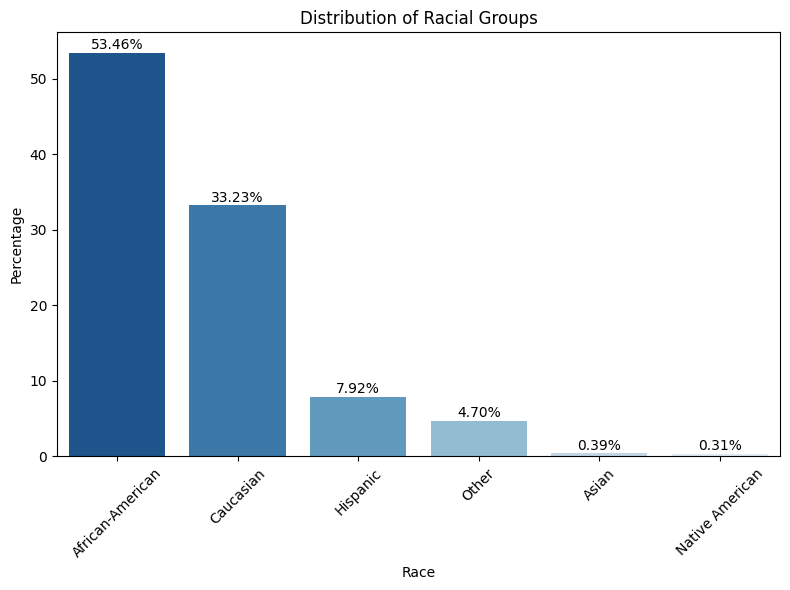

In [15]:
# Calculate percentage of each race
race_percentage = compas['race'].value_counts(normalize=True) * 100

# Sort races by count in descending order
race_percentage = race_percentage.sort_values(ascending=False)

# Visualize race distribution with percentage labels
plt.figure(figsize=(8, 6))
sns.barplot(x=race_percentage.index, y=race_percentage.values, palette="Blues_r")

# Add percentage labels to each bar
for i, val in enumerate(race_percentage.values):
    plt.text(i, val + 0.5, f"{val:.2f}%", ha="center")

plt.title('Distribution of Racial Groups')
plt.xlabel('Race')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**The bar plot shows African-American had highest cases of 53.46% follow by Caucasia with 33.23% and Native American had the lowest cases of less than 1%.**

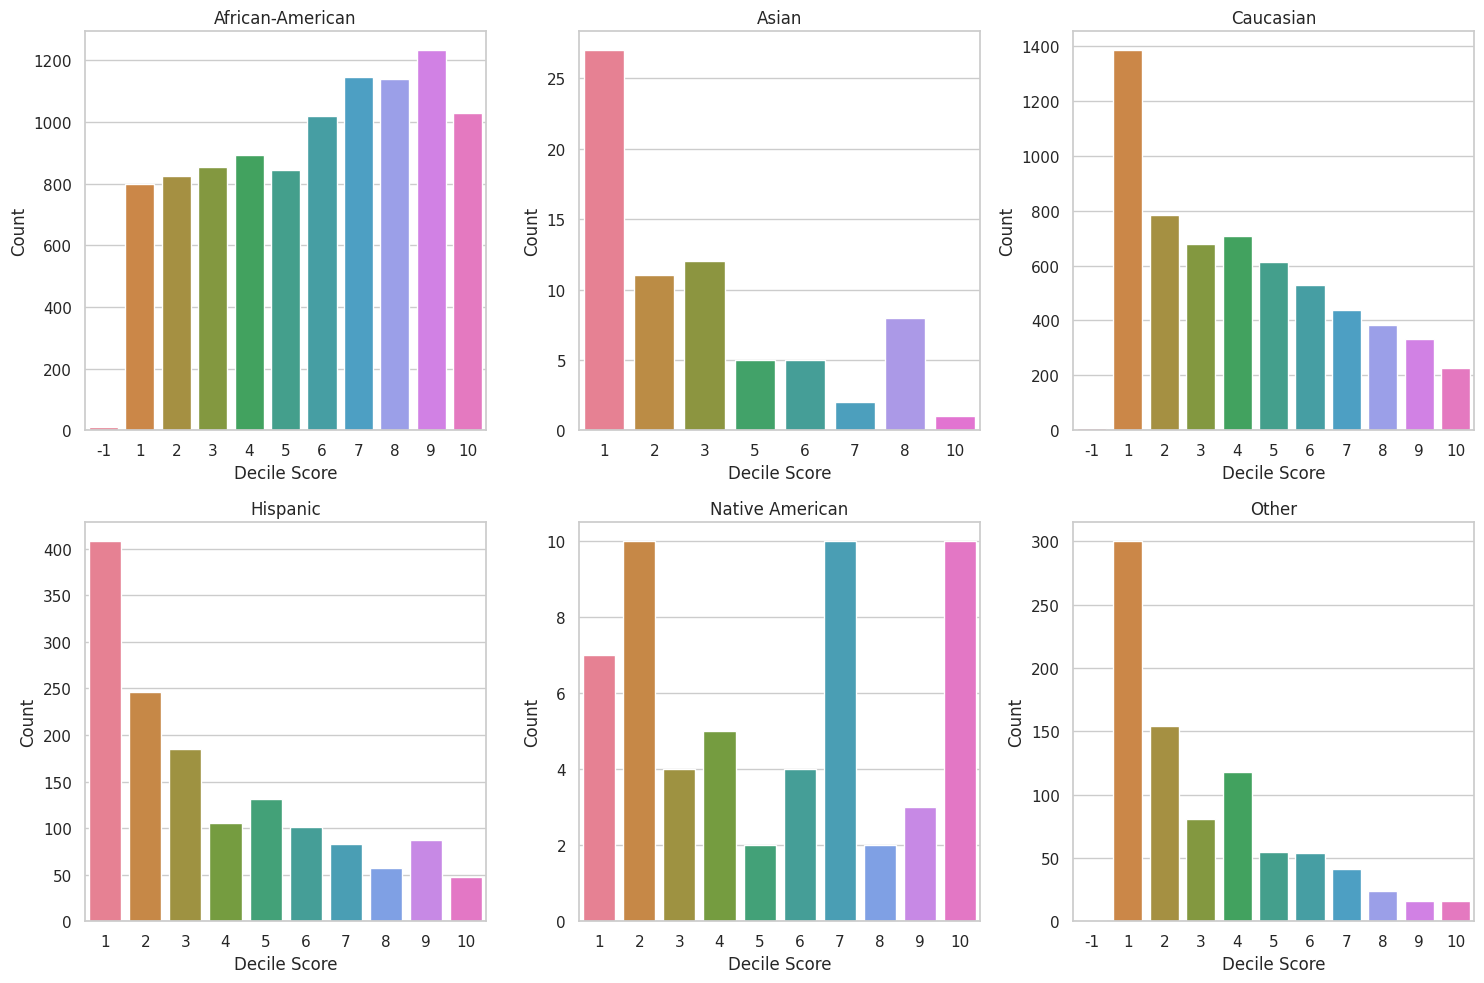

In [16]:
# Define a list of racial groups
racial_groups = ['African-American', 'Asian', 'Caucasian', 'Hispanic', 'Native American', 'Other']

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a grid of count plots for each race's decile scores
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, race in enumerate(racial_groups):
    # Filter the dataframe for the current racial group
    race_data = compas[compas['race'] == race]
    
    # Create a count plot for the decile scores of the current racial group
    sns.countplot(x='decile_score', data=race_data, ax=axes[i], palette='husl')
    axes[i].set_title(race)
    axes[i].set_xlabel('Decile Score')
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

**African-American have negatively skewed toward the higher risk.**

**Caucasian, Hispanic, Other and Asia are skew toward the lower risk.**

**Native American have inbalance distribution.**

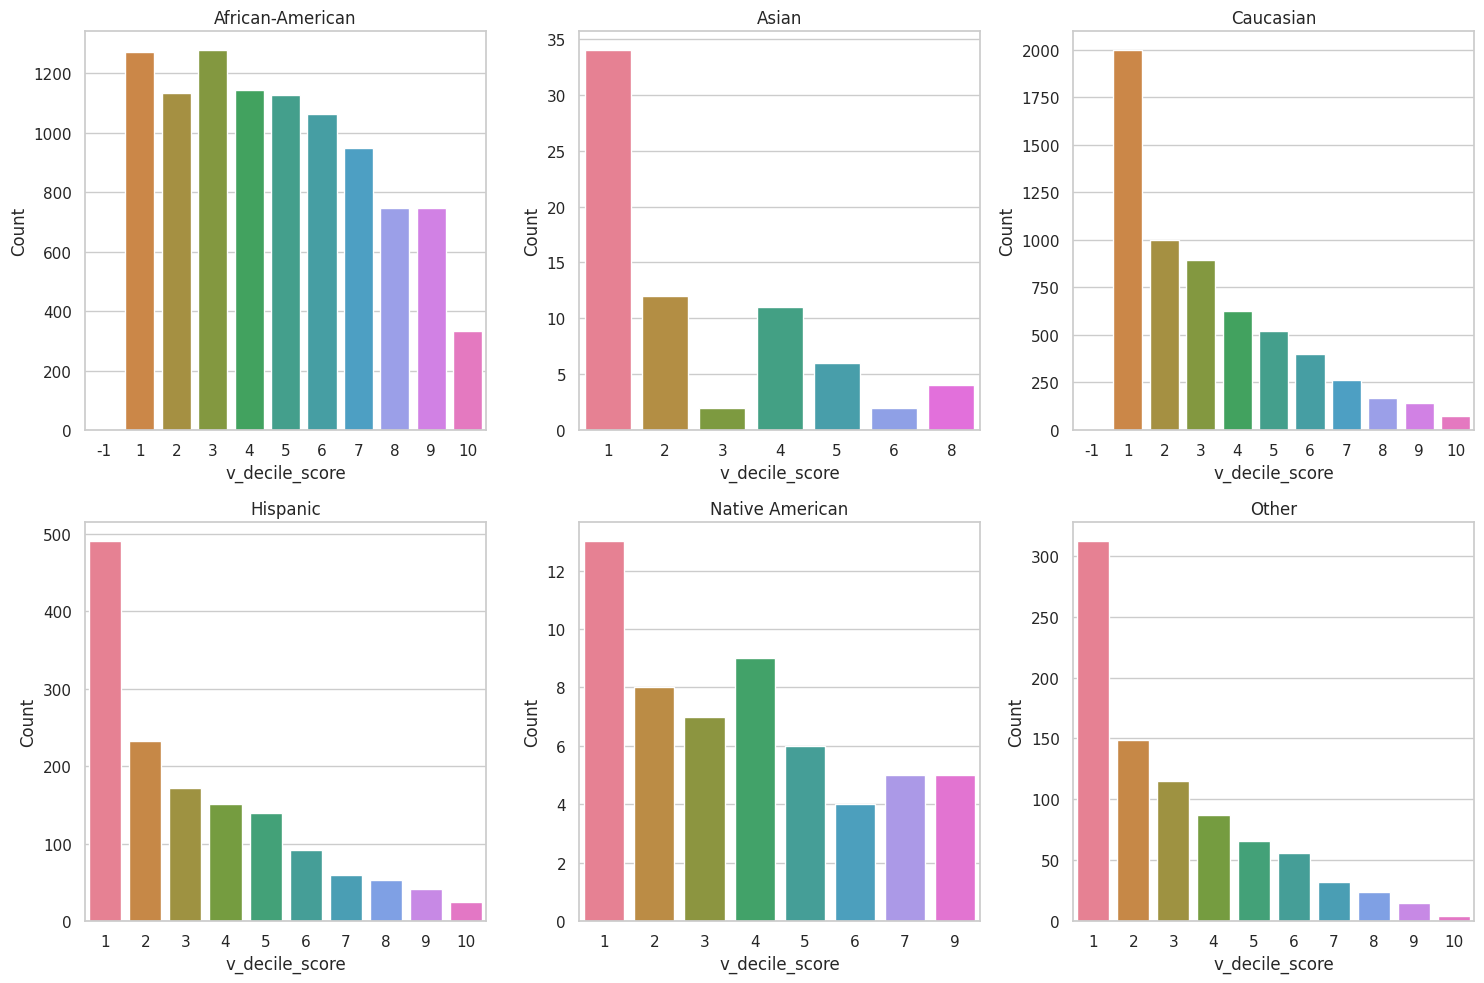

In [17]:
# Define a list of racial groups
racial_groups = ['African-American', 'Asian', 'Caucasian', 'Hispanic', 'Native American', 'Other']

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a grid of count plots for each race's v_decile_scores
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, race in enumerate(racial_groups):
    # Filter the dataframe for the current racial group
    race_data = compas[compas['race'] == race]
    
    # Create a count plot for the v_decile_scores of the current racial group
    sns.countplot(x='v_decile_score', data=race_data, ax=axes[i], palette='husl')
    axes[i].set_title(race)
    axes[i].set_xlabel('v_decile_score')
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

**Aside African_American and Native American thats are slightly positively skewed toward the lower violent risk assessment, the rest of the race are strongly positively skewed to violent risk assessment.**

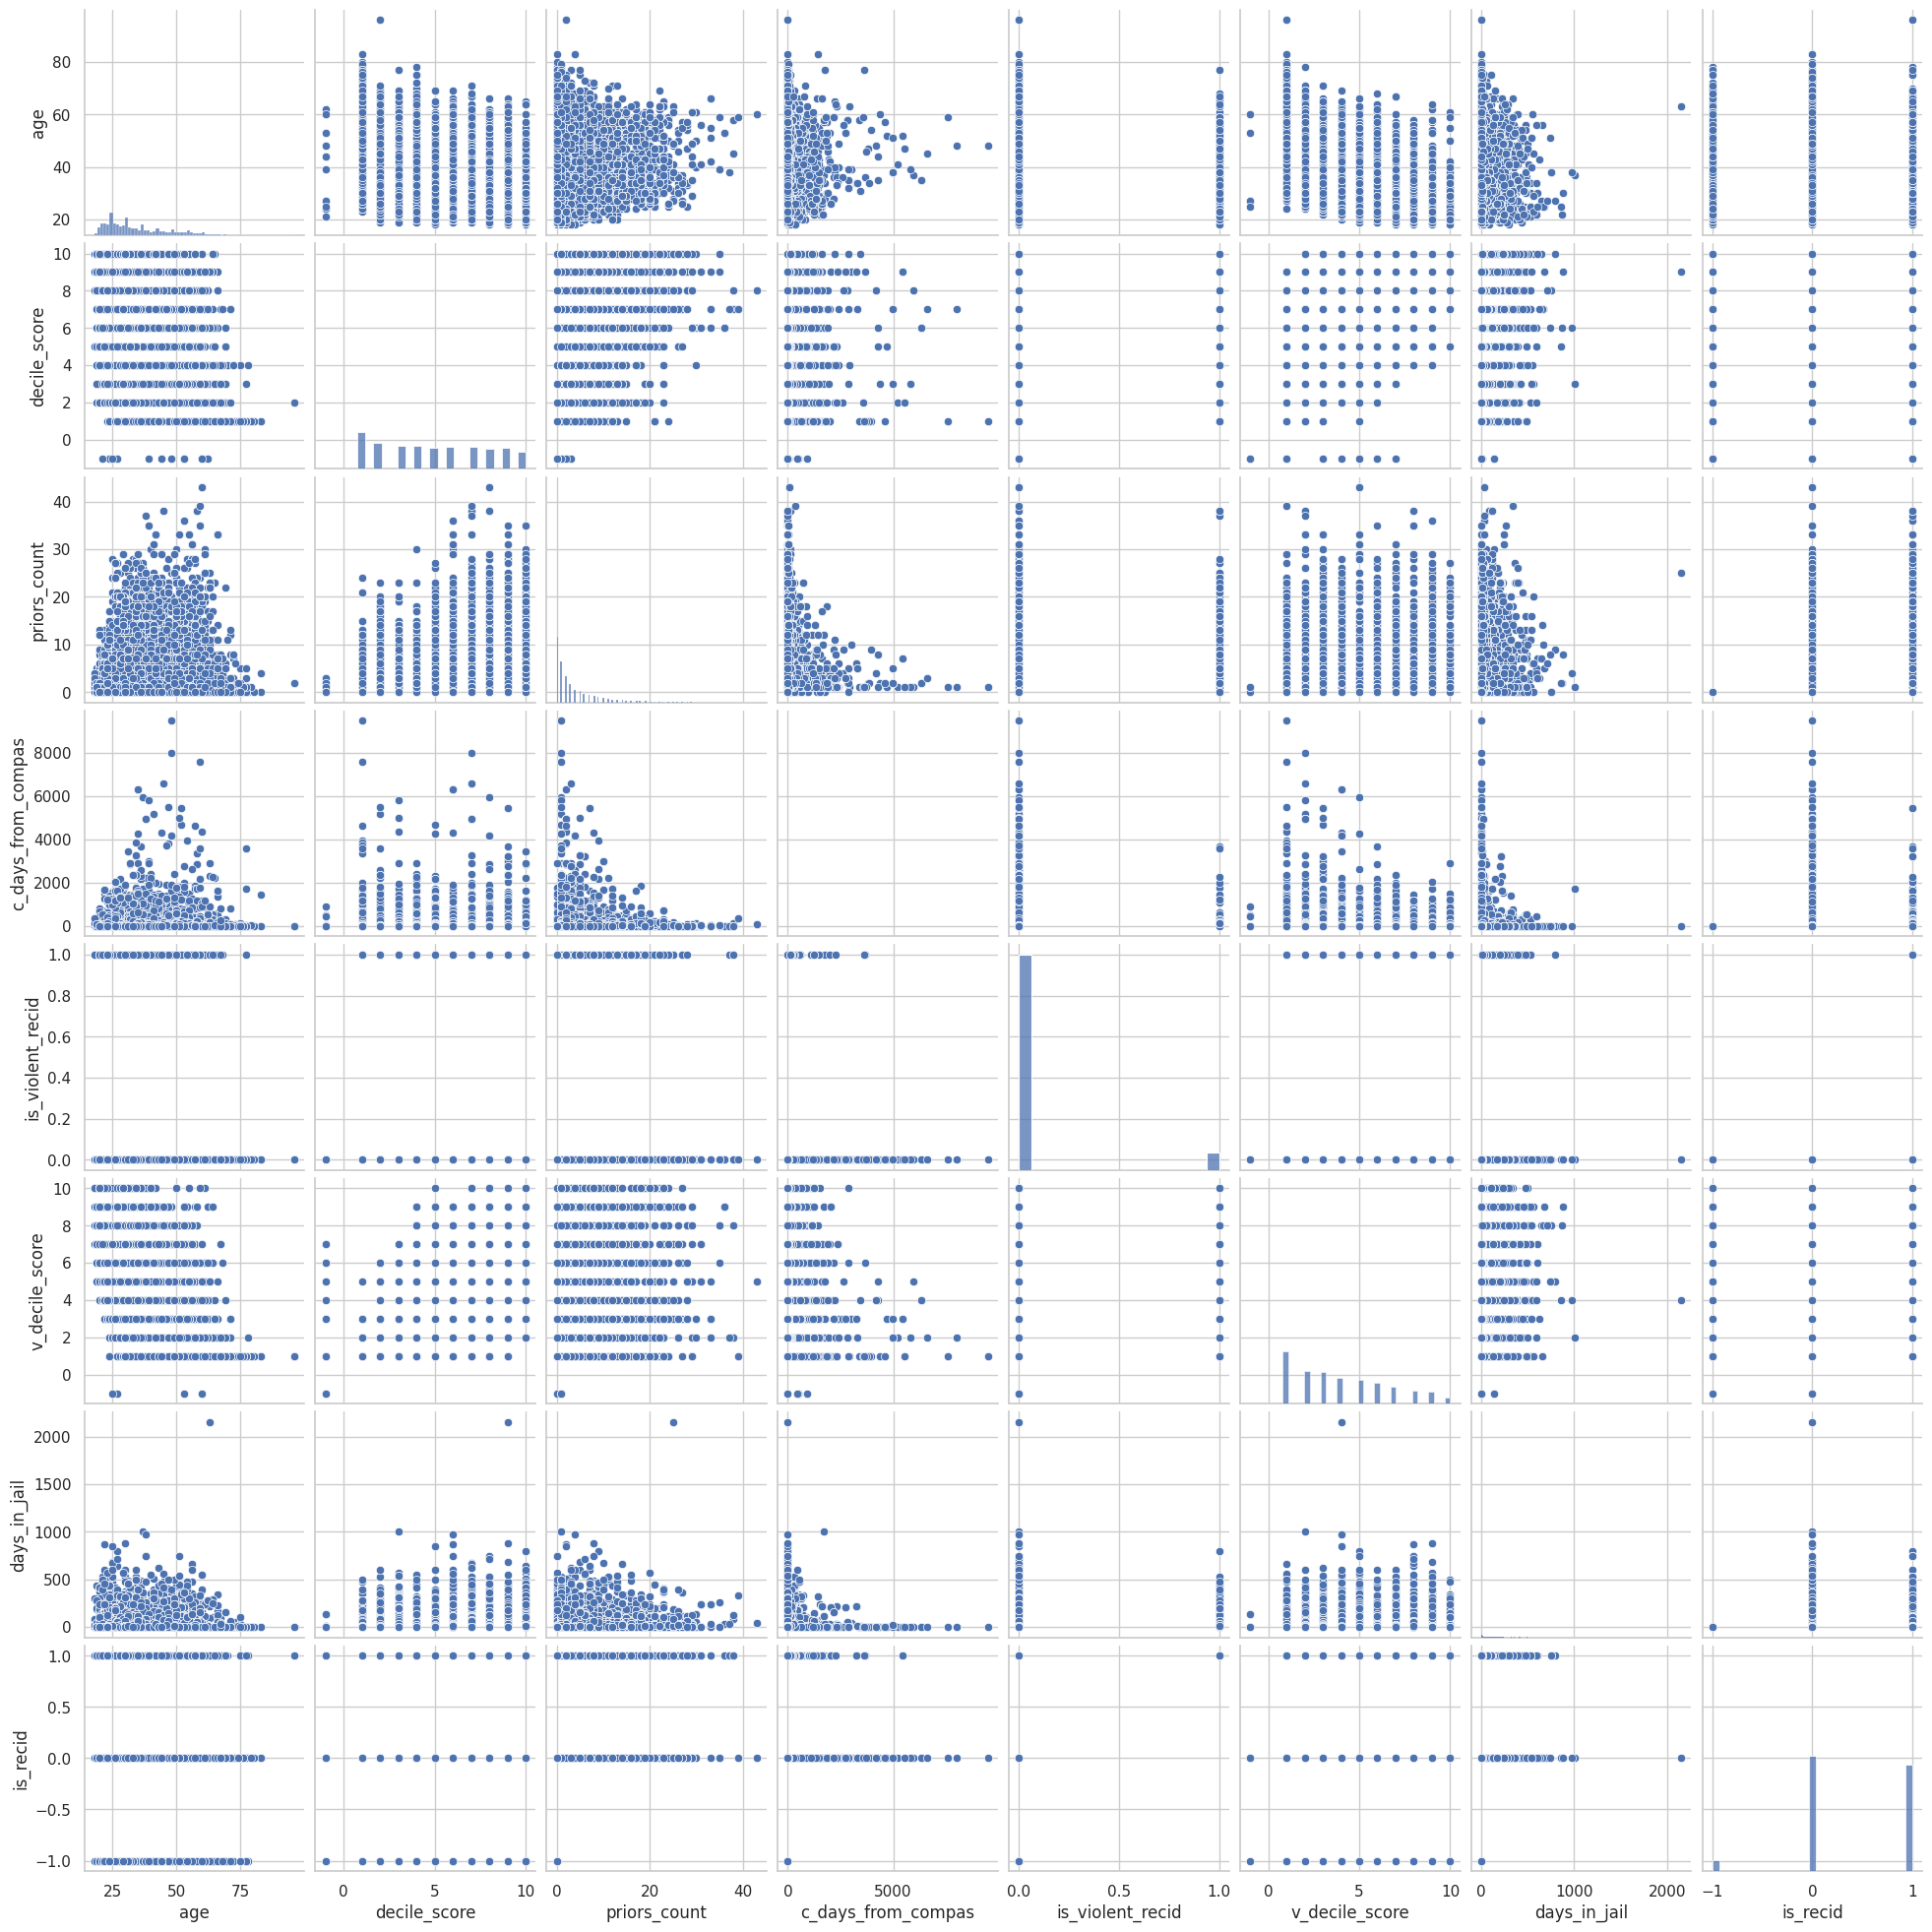

In [18]:
# Plot pairplot of age, decile score, and priors count
sns.pairplot(compas[['age', 'decile_score', 'priors_count', 'c_days_from_compas', 'is_violent_recid', 'v_decile_score', 'days_in_jail', 'is_recid']])
plt.show()

**The pairplot is a combination of scatter plot, which also have same interpretation with heatmap. The plot shows that decile_score, priors_count, is_violent_recid and v_decile_score only contributed to determination of is_recid (whether the defendant was recidivated within a specific time frame).**

In [19]:
#Converting Sex to numerical value from object

compas["sex"].replace({'Male': 1, 'Female': 0}, inplace=True)

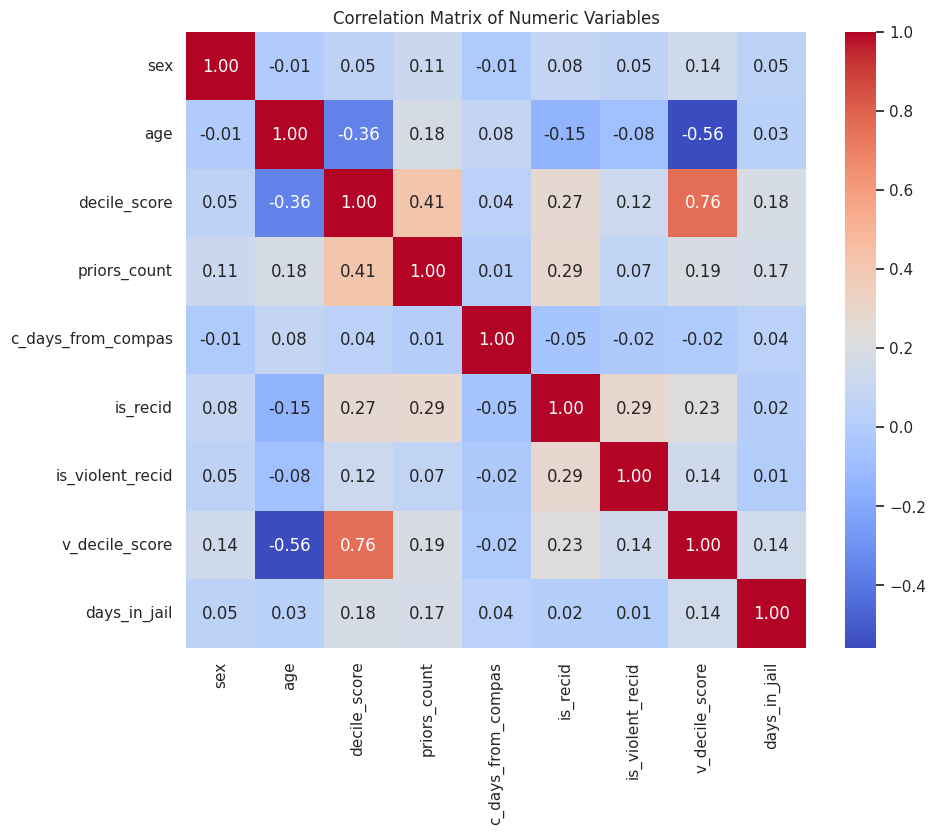

In [20]:
# Filter out object variables
numeric_variables = compas.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr_matrix = numeric_variables.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

**The heatmap plot the correlation between the dependent and independents variables. The plot shows that decile_score, priors_count, is_violent_recid and v_decile_score while the rest have almost zero effect on is_recid(whether the defendant was recidivated within a specific time frame).**

### 4.Training_the_Dataset_and_Modelling

In [21]:
# Selecting X and Y
X = compas[['age', 'sex', 'decile_score', 'priors_count', 'race', 'days_in_jail', 'c_days_from_compas', 'is_violent_recid', 'v_decile_score']]
Y = compas['is_recid']

In [22]:
#Checking the five  row of the data set X

X.head()

,age,sex,decile_score,priors_count,race,days_in_jail,c_days_from_compas,is_violent_recid,v_decile_score
0,69,1,1,0,Other,0.0,1.0,0,1
1,69,1,1,0,Other,0.0,1.0,0,1
2,31,1,5,0,Caucasian,0.0,1.0,0,2
3,34,1,3,0,African-American,10.0,1.0,1,1
4,24,1,4,4,African-American,1.0,1.0,0,3


In [23]:
# Encode the 'race' column
X_encoded = X.copy() 
X_encoded['race_encoded'] = label_encoder.fit_transform(X['race'])

In [24]:
# Drop the original 'race' column
X_encoded.drop(['race'], axis=1, inplace=True)

In [25]:
# Splitting the Dataset for Training and Testing
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, stratify=X_encoded[['race_encoded']], random_state=42)

In [26]:
# Scale numerical features

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Initialize the Model (Random Forest Classifier)
model = RandomForestClassifier()

In [28]:
# Train the Model
model.fit(X_train_scaled, Y_train)

RandomForestClassifier()

In [29]:
# Evaluate the Model
Y_pred = model.predict(X_test_scaled)

In [30]:
# Calculate evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Confusion Matrix:
 [[  94   57   12]
 [  40 1581  183]
 [   7  133 1557]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.67      0.58      0.62       163
           0       0.89      0.88      0.88      1804
           1       0.89      0.92      0.90      1697

    accuracy                           0.88      3664
   macro avg       0.82      0.79      0.80      3664
weighted avg       0.88      0.88      0.88      3664



**Confusion Matrix:** Diagonal Values (True Positives and True Negatives): The values on the diagonal (97, 1586, and 1548) represent the instances that were correctly classified. These values indicate that the model has correctly predicted a significant portion of the data.

**Model Accuracy:** A Random Forest model accuracy of 0.88, or 88%, indicates that the model correctly predicts the target variable for 88% of the instances in the dataset.

#### 4.1.Racial_Group_Modelling

In [31]:
# Define a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the LabelEncoder to the 'race' column
label_encoder.fit(X['race'])

# Iterate over each racial group
for group in racial_groups:
    # Filter test data for the current racial group
    group_indices = X_test['race_encoded'] == label_encoder.transform([group])[0]
    group_Y_test = Y_test[group_indices]
    group_Y_pred = Y_pred[group_indices]  # Assuming Y_pred contains predictions for all samples
    
    # Print classification report for the current racial group
    print(f"Classification Report for {group}:")
    print(classification_report(group_Y_test, group_Y_pred))
    
    # Print confusion matrix for the current racial group
    print(f"Confusion Matrix for {group}:")
    print(confusion_matrix(group_Y_test, group_Y_pred))
    print(f"-----------------------------------------------------")

Classification Report for African-American:
              precision    recall  f1-score   support

          -1       0.64      0.71      0.68        70
           0       0.90      0.84      0.87       881
           1       0.89      0.93      0.91      1008

    accuracy                           0.88      1959
   macro avg       0.81      0.83      0.82      1959
weighted avg       0.88      0.88      0.88      1959

Confusion Matrix for African-American:
[[ 50  16   4]
 [ 22 744 115]
 [  6  68 934]]
-----------------------------------------------------
Classification Report for Asian:
              precision    recall  f1-score   support

          -1       1.00      0.25      0.40         4
           0       0.67      1.00      0.80         6
           1       1.00      1.00      1.00         4

    accuracy                           0.79        14
   macro avg       0.89      0.75      0.73        14
weighted avg       0.86      0.79      0.74        14

Confusion Matrix for A

#### 4.1.1.Model_Interpretation

**The above result are the performance metrics for each of the racial group.**

**The most highest model accuracy indicate the best model.**

**The Random Forest model demonstrates relatively high accuracy across all racial groups, with accuracies ranging from 0.79 to 0.91. This suggests that the model performs well in predicting outcomes for individuals from diverse racial backgrounds.**

#### 4.1.2.Identifing_Bias_in_the_Model's_Predicted

**To identify whether the model's predictions disproportionately impact certain racial groups, I analyze the confusion matrices for each racial group:**

    African-American:
        True Positive (TP): 747
        False Positive (FP): 17 + 112 = 129
        True Negative (TN): 49 + 22 + 71 + 930 = 1072
        False Negative (FN): 7 + 71 = 78

    Disproportionate Impact: The false positive rate (129) for African-Americans appears relatively high compared to the true positive rate (747), indicating potential bias in false predictions, particularly false positives.

    Asian:
        TP: 6
        FP: 3
        TN: 1 + 4 = 5
        FN: 0

    Disproportionate Impact: The sample size is small, but the model appears to have a low false positive rate, which is a positive sign. 

    Caucasian:
        TP: 571
        FP: 27 + 52 = 79
        TN: 33 + 11 + 1 + 42 + 478 = 565
        FN: 3 + 1 = 4

    Disproportionate Impact: The false positive rate (79) for Caucasians is relatively high compared to the true positive rate (571), indicating potential bias in false predictions, particularly false positives.

    Hispanic:
        TP: 165
        FP: 4
        TN: 8 + 6 + 3 + 15 + 82 = 114
        FN: 3 + 15 = 18

    Disproportionate Impact: The false positive rate (4) for Hispanics is low compared to the true positive rate (165), which is a positive sign. 

    Native American:
        TP: 5
        FP: 0
        TN: 3 + 2 = 5
        FN: 0 + 1 = 1

    Disproportionate Impact: With a small sample size, it's challenging to draw conclusions. However, the absence of false positives is a positive indicator.

    Other:
        TP: 92
        FP: 5 + 10 = 15
        TN: 3 + 1 + 0 + 9 + 52 = 65
        FN: 0

    Disproportionate Impact: The false positive rate (15) for the "Other" group is relatively high compared to the true positive rate (92), indicating potential bias in false predictions.

**In summary base on the dataset, the analysis suggests potential bias in false predictions (false positives) for African-American, Caucasian, and Other racial groups. Additionally, caution should be exercised when interpreting results for racial groups with small sample sizes, such as Asian and Native American, due to limited data.**


#### 4.1.3.Racial_Group_Modelling_Visualisation

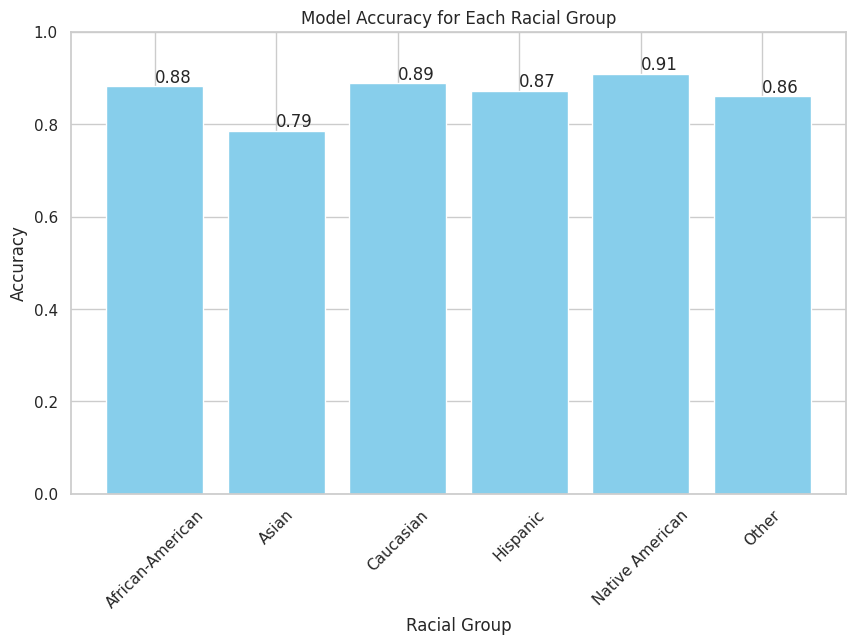

In [32]:
# Define lists to store racial groups and accuracy scores
racial_groups = ['African-American', 'Asian', 'Caucasian', 'Hispanic', 'Native American', 'Other']
accuracy_scores = []

# Iterate over each racial group
for group in racial_groups:
    # Filter test data for the current racial group
    group_indices = X_test['race_encoded'] == label_encoder.transform([group])[0]
    group_Y_test = Y_test[group_indices]
    group_Y_pred = Y_pred[group_indices]
    
    # Calculate accuracy for the current racial group
    accuracy = accuracy_score(group_Y_test, group_Y_pred)
    accuracy_scores.append(accuracy)

# Create a DataFrame to store racial groups and accuracy scores
accuracy_df = pd.DataFrame({'Racial Group': racial_groups, 'Accuracy': accuracy_scores})

# Plot the accuracy scores for each racial group
plt.figure(figsize=(10, 6))
bars = plt.bar(accuracy_df['Racial Group'], accuracy_df['Accuracy'], color='skyblue')

# Add labels to each bar with accuracy figures
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.title('Model Accuracy for Each Racial Group')
plt.xlabel('Racial Group')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limits to ensure proper visualization
plt.show()


**This visualization allows me to easily compare the performance metrics of the racial group based on their accuracy, the chart also shows that Native American and Caucasian have the best model with the highest value of model accuracy.**

#### 4.2.Hyperparameter_Tuning_Racial_Group_Modelling

In [33]:
# Define the pipeline with preprocessing steps and the classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('clf', RandomForestClassifier())  # Classifier
])

# Define the hyperparameter grid to search
param_grid = {
    'clf__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'clf__max_depth': [None, 5, 10],  # Maximum depth of the tree
    'clf__min_samples_split': [2, 5, 10]  # Minimum number of samples required to split a node
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters and the corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

# Iterate over each racial group
for group in racial_groups:
    # Filter test data for the current racial group
    group_indices = X_test['race_encoded'] == label_encoder.transform([group])[0]
    group_Y_test = Y_test[group_indices]
    group_Y_pred = Y_pred[group_indices]
    
    # Print classification report for the current racial group
    print(f"Classification Report for {group}:")
    print(classification_report(group_Y_test, group_Y_pred))
    
    # Print confusion matrix for the current racial group
    print(f"Confusion Matrix for {group}:")
    print(confusion_matrix(group_Y_test, group_Y_pred))
    print(f"-----------------------------------------------------")


Best Hyperparameters: {'clf__max_depth': None, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
Best Accuracy: 0.8467111249291148
Classification Report for African-American:
              precision    recall  f1-score   support

          -1       0.65      0.67      0.66        70
           0       0.90      0.85      0.87       881
           1       0.89      0.93      0.91      1008

    accuracy                           0.88      1959
   macro avg       0.81      0.82      0.81      1959
weighted avg       0.89      0.88      0.88      1959

Confusion Matrix for African-American:
[[ 47  19   4]
 [ 20 749 112]
 [  5  66 937]]
-----------------------------------------------------
Classification Report for Asian:
              precision    recall  f1-score   support

          -1       1.00      0.25      0.40         4
           0       0.67      1.00      0.80         6
           1       1.00      1.00      1.00         4

    accuracy                           0.79      

**Hyperparameter tuning had varied effects on model performance across different racial groups, with some experiencing minor improvements or declines while others remained relatively unchanged. Overall, the impact of hyperparameter tuning on this model accuracy appears to be limited for most racial groups.**

**The accuracy hyperparameter tuning indicating that the initial model performed better than the tuned model for this racial group.**

#### 4.2.1.Hyperparameter_Tuning_Racial_Group_Modelling_Vis

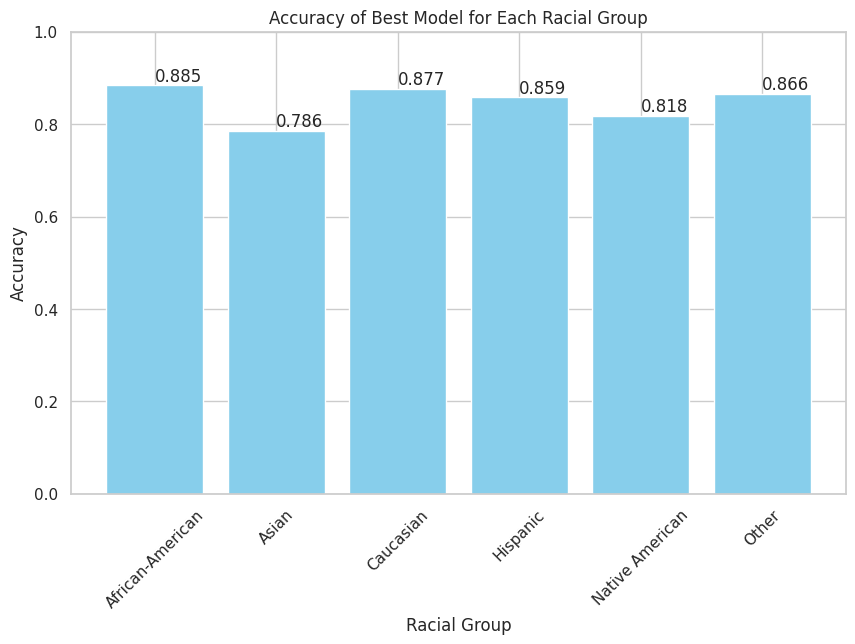

In [34]:
# Define a list to store accuracy scores for each racial group
accuracy_scores = []

# Iterate over each racial group
for group in racial_groups:
    # Filter test data for the current racial group
    group_indices = X_test['race_encoded'] == label_encoder.transform([group])[0]
    group_X_test = X_test[group_indices]
    group_Y_test = Y_test[group_indices]
    
    # Calculate accuracy for the current racial group
    accuracy = best_model.score(group_X_test, group_Y_test)
    accuracy_scores.append(accuracy)

# Plot the accuracy scores for each racial group
plt.figure(figsize=(10, 6))
bars = plt.bar(racial_groups, accuracy_scores, color='skyblue')

# Add labels to each bar with accuracy figures
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', va='bottom')

plt.title('Accuracy of Best Model for Each Racial Group')
plt.xlabel('Racial Group')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits to ensure proper visualization
plt.xticks(rotation=45)
plt.show()

**This visualization allows me to easily compare the hyperperformance tuning performance metrics of the racial group based on their accuracy, the chart also shows that African-American and Caucasian have the best model with the highest value of model accuracy.**

## Thank you